# Case Study

Content : You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement : You own a small supermarket and want to understand your customers like who can be Target Customers for a new chain of products you plan to launch. This would also help the marketing team to plan their strategy.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [5]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
# no. of rows and columns
data.shape

(200, 5)

In [11]:
data.info()
# there are no missing values as all the columns has 200 entries properly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# check for missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# Feature Selection
## Annual Income and Spending Score are the two important variables

features=["Annual Income (k$)","Spending Score (1-100)"]
X=data[features]

In [22]:
X.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


# Building the Model
The tricky part in KMeans Algorithm is to find rigth n_clusters. The best method to find n_clusters is using Elbow method.

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss=[]

In [28]:
# We generally assume the number of clusters to be 10
# then we can judge the number of clusters by averaging

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=123)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

# inertia_ is the Sum of Squares within cluster
# WCSS is the sum of squares of the distances of each data point 
# in all clusters to their respective centroids. 
# The idea is to minimise the sum.

[269981.28000000014,
 182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25005.550372432845,
 21806.812998695466,
 19704.123543147773]

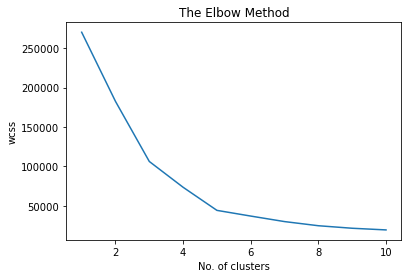

In [29]:
# Visualising thE ELBOW to get the best value of k

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

In [30]:
## From the above graph, we can say that the optimum value of k=5 as the last
## elbow is seen at 5

In [33]:
kmeansmodel=KMeans(n_clusters=5,random_state=123)
y_kmeans=kmeansmodel.fit_predict(X)

In [38]:
customers = data.iloc[ : , [3,4]].values
customers[  : 2]

array([[15, 39],
       [15, 81]], dtype=int64)

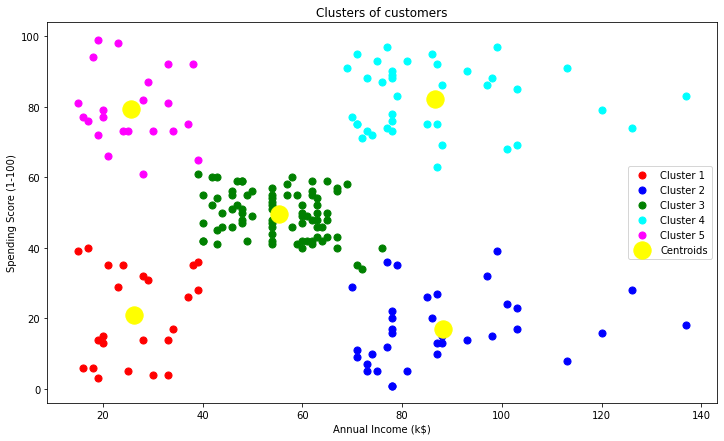

In [39]:
# Visualizing all the clusters 
plt.figure(figsize=(12,7))

plt.scatter(customers[y_kmeans == 0, 0], customers[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(customers[y_kmeans == 1, 0], customers[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(customers[y_kmeans == 2, 0], customers[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(customers[y_kmeans == 3, 0], customers[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(customers[y_kmeans == 4, 0], customers[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show();

# Model Interpretation :

Cluster 1 (Red Color) -> mid level earning and mid-spending

Cluster 2 (Blue Color) -> low earners and high spenders

Cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]

Cluster 4 (cyan Color) -> earning less , spending less

Cluster 5 (magenta Color) -> Earning more , spending less

Outcome of the Analysis :
We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these Target Customers can easily be convinced to buy newer brand products. Wherein others we can set like once in a week or once in a month.